In [5]:
from google.colab import files
uploaded = files.upload()

Saving ai_dev_productivity.csv to ai_dev_productivity.csv


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

In [6]:
df = pd.read_csv('ai_dev_productivity.csv')
df

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


In [7]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.shape

(500, 9)

In [10]:
df.tail()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0
499,2.23,252,4,8.8,0,0,1.05,2.6,0


In [11]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [ ]:
print(df.columns)

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success'],
      dtype='object')


In [12]:
# create a table with data missing
missing_values= df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
hours_coding,0,0.0
coffee_intake_mg,0,0.0
distractions,0,0.0
sleep_hours,0,0.0
commits,0,0.0
bugs_reported,0,0.0
ai_usage_hours,0,0.0
cognitive_load,0,0.0
task_success,0,0.0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['missing_values ']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'missing_values '}, axis=1)
              .sort_values('missing_values ', ascending=True))
  xs = counted['missing_values ']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = frame.sort_values('missing_values ', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('missing_values ')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['percent_missing %']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'percent_missing %'}, axis=1)
              .sort_values('percent_missing %', ascending=True))
  xs = counted['percent_missing %']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = frame.sort_values('percent_missing %', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('percent_missing %')
_ = plt.ylabel('count()')

In [21]:
df.dtypes

,0
hours_coding,float64
coffee_intake_mg,int64
distractions,int64
sleep_hours,float64
commits,int64
bugs_reported,int64
ai_usage_hours,float64
cognitive_load,float64
task_success,int64


In [22]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
df.isnull().sum()

,0
hours_coding,0
coffee_intake_mg,0
distractions,0
sleep_hours,0
commits,0
bugs_reported,0
ai_usage_hours,0
cognitive_load,0
task_success,0


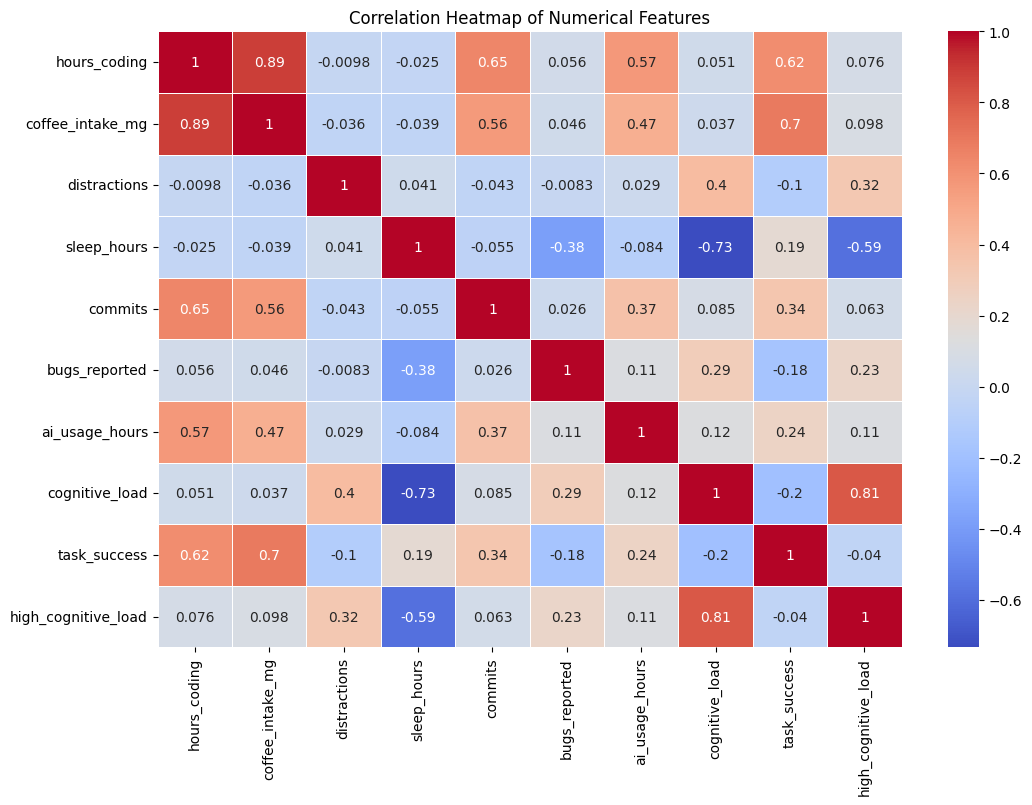

In [61]:
#data visualisation and feature listing
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [59]:
# prompt: make a simple bar graphs of the dataset numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# for col in numerical_cols:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(df[col], kde=True, bins=30, color='skyblue')
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.tight_layout()
#     plt.show()

import matplotlib.pyplot as plt
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

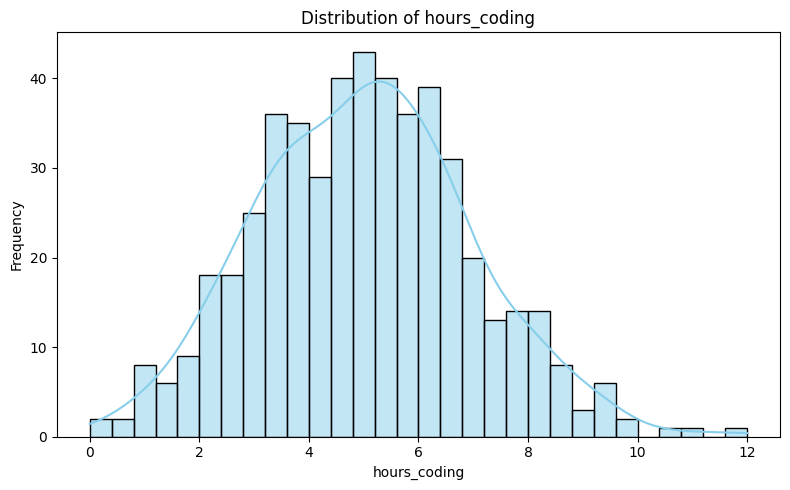

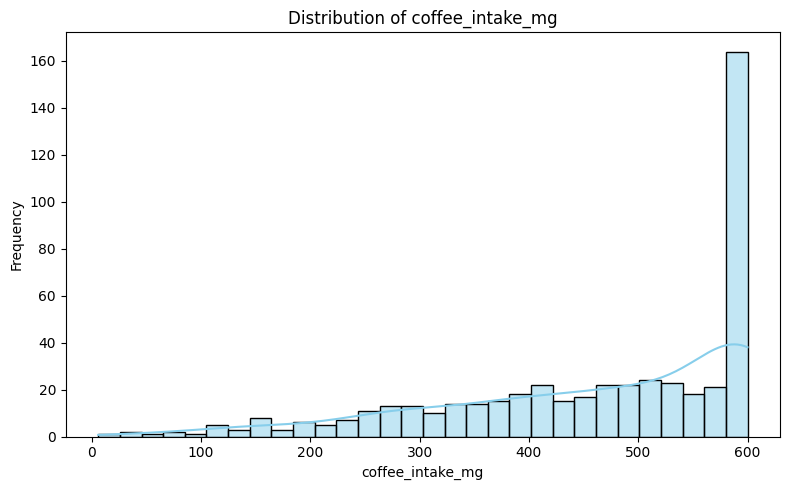

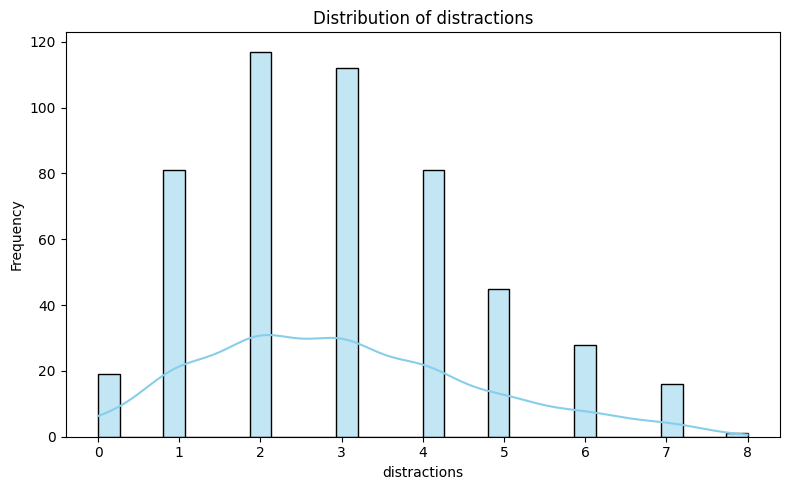

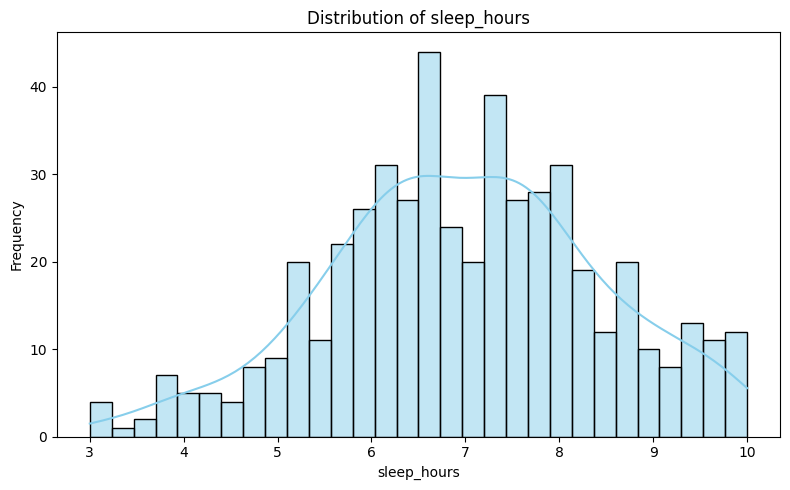

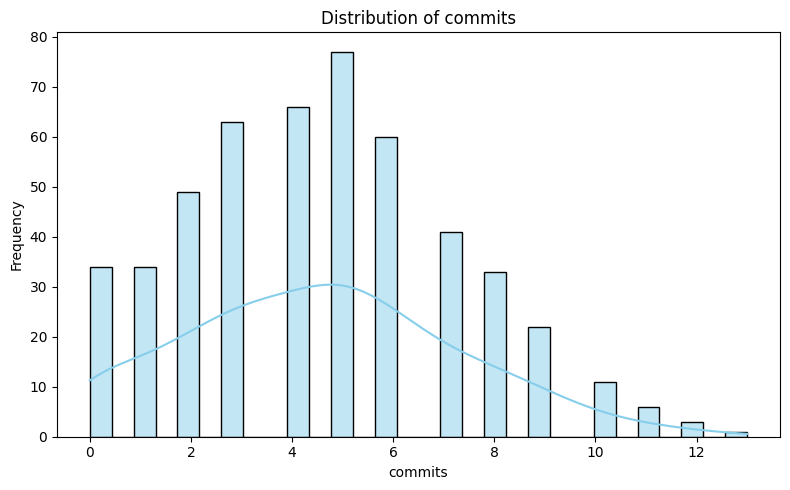

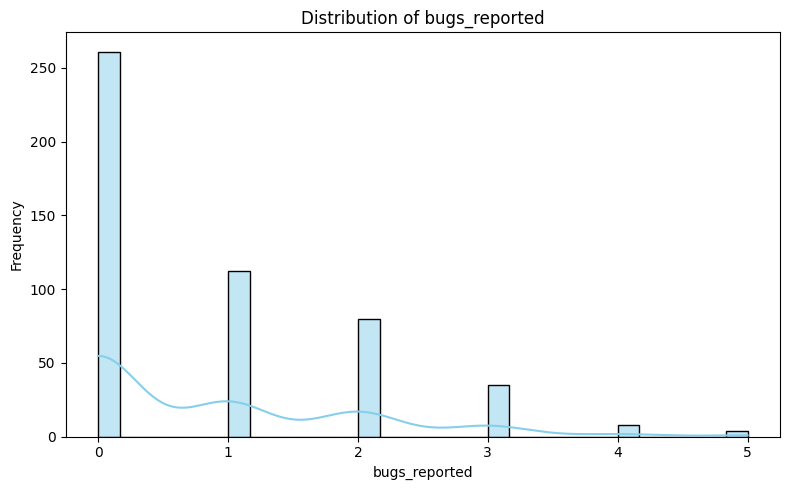

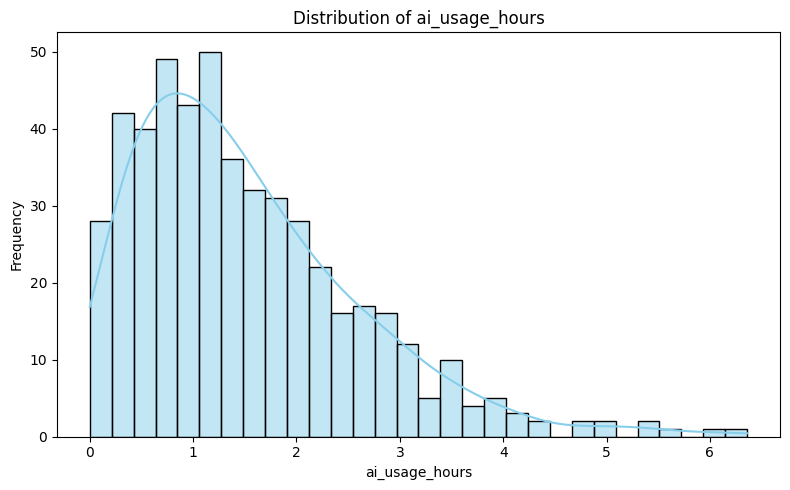

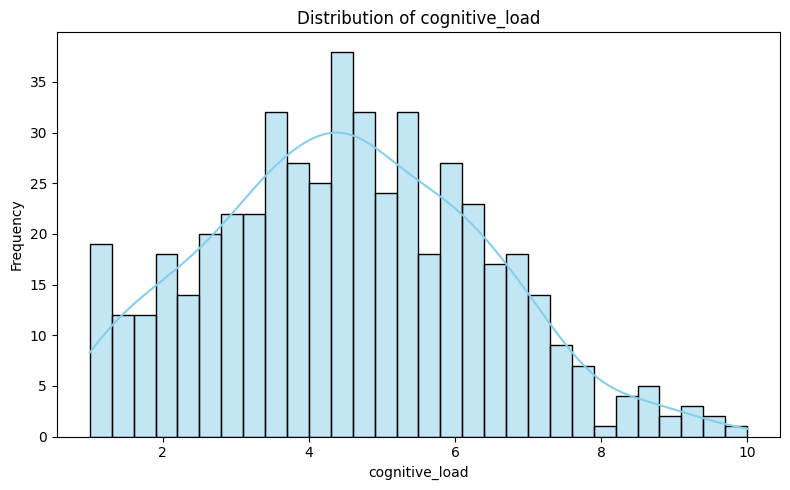

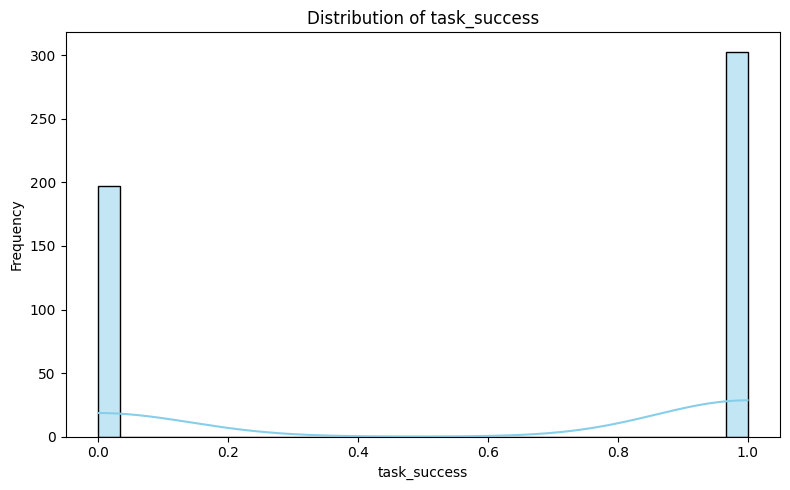

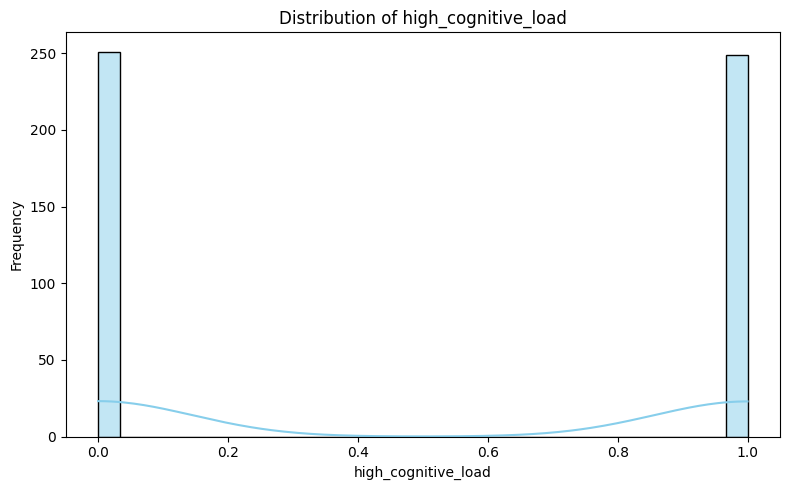

In [60]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

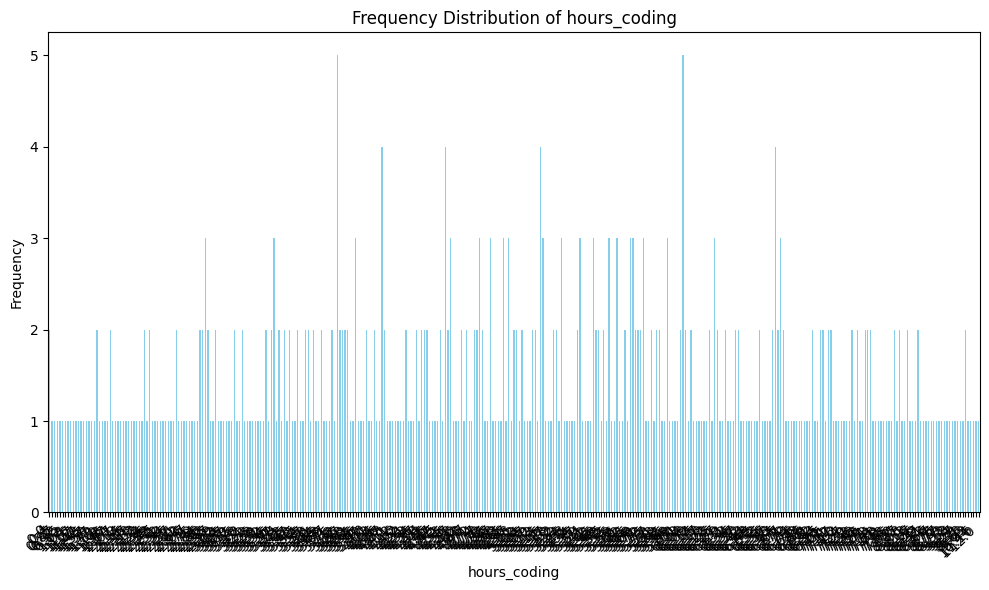

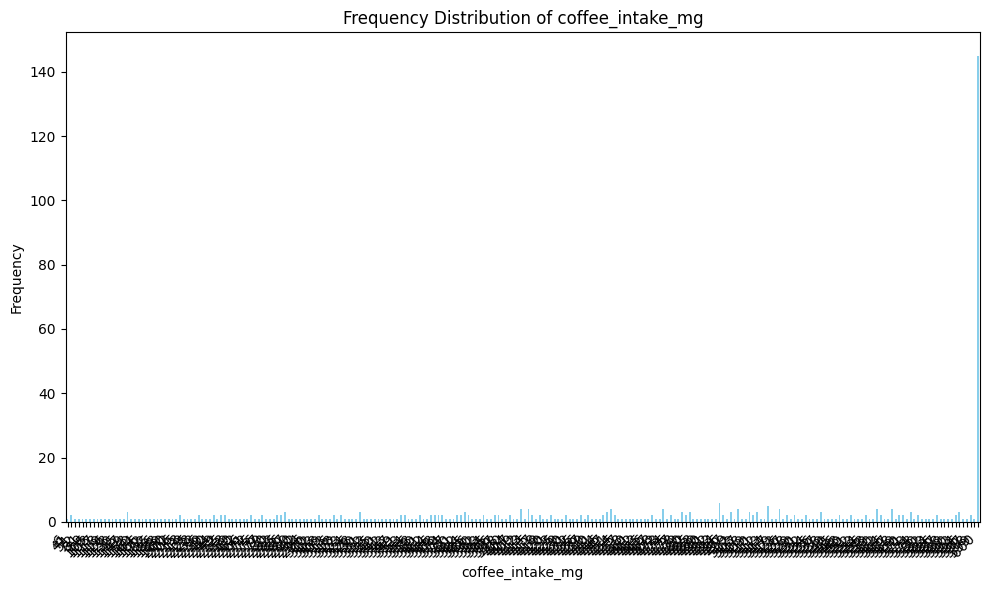

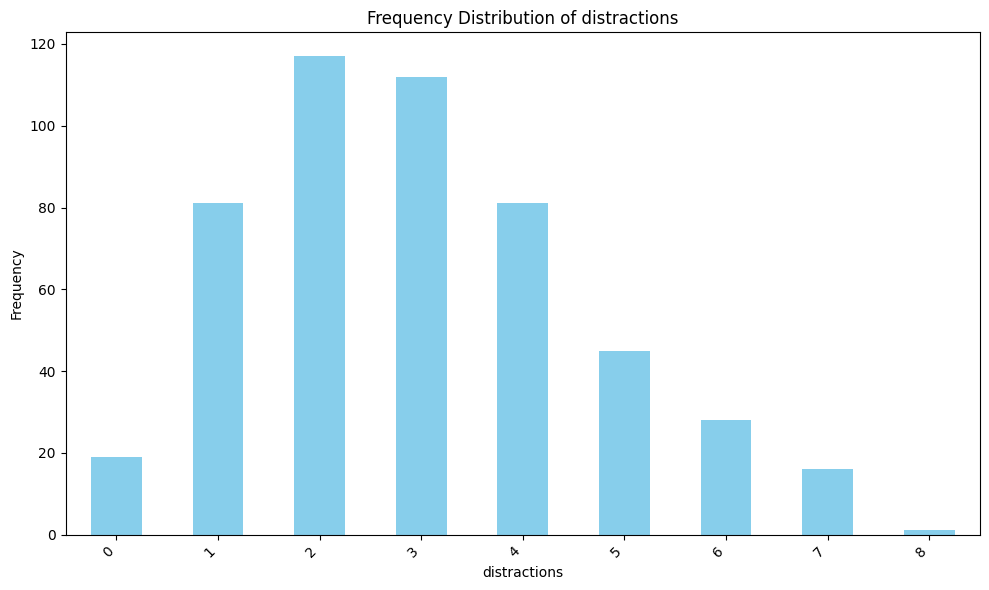

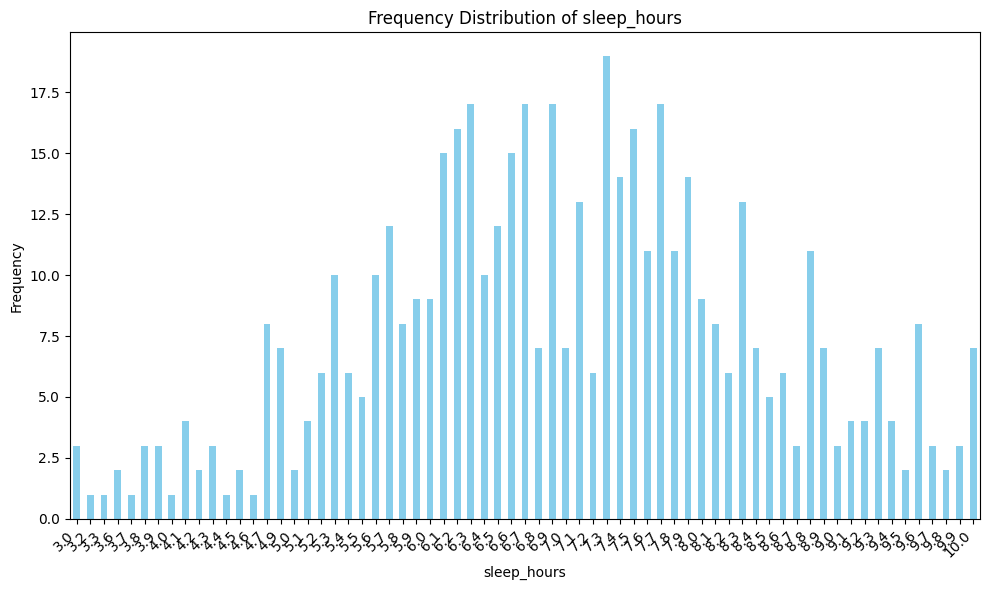

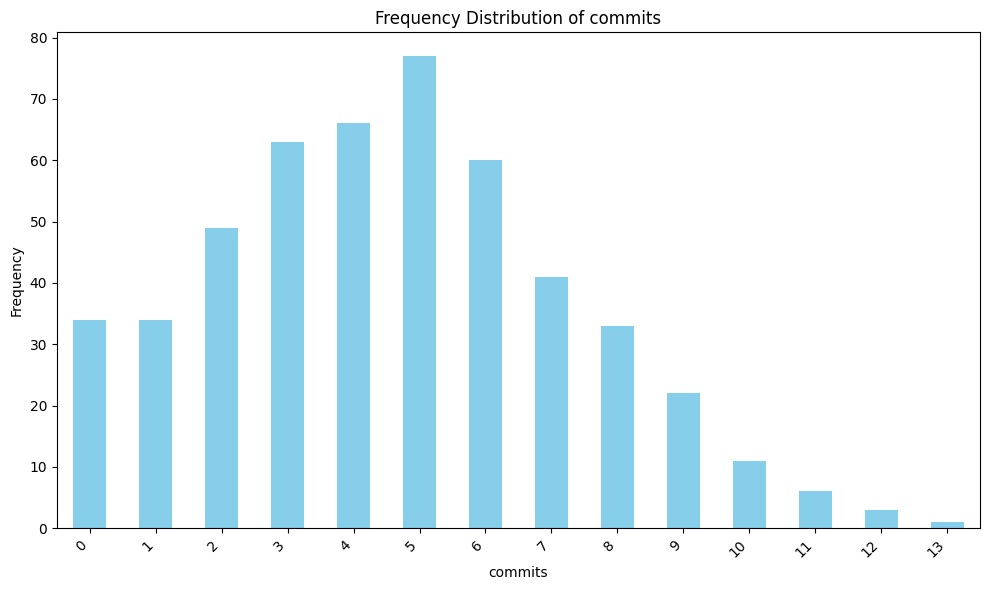

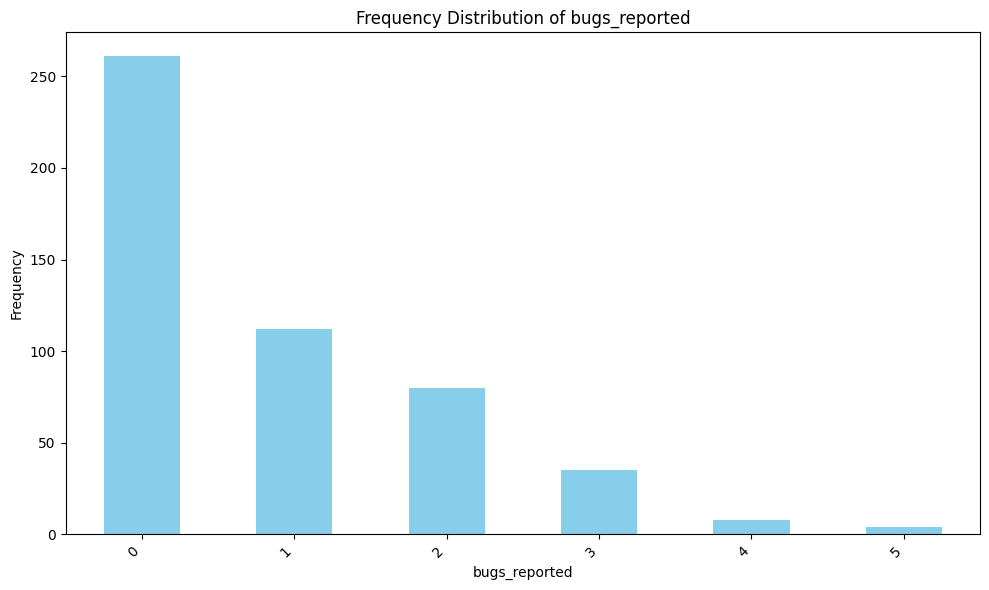

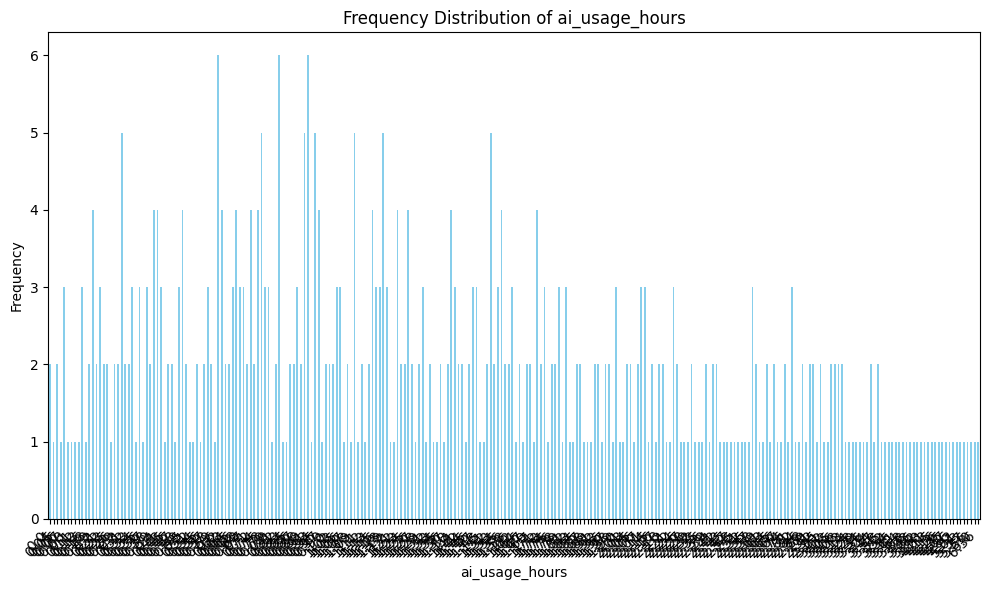

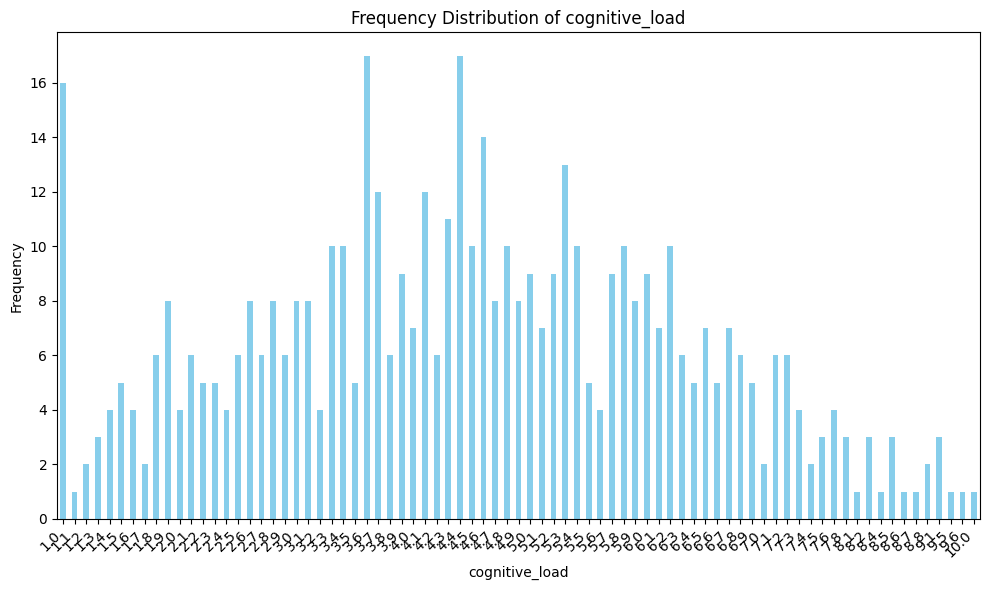

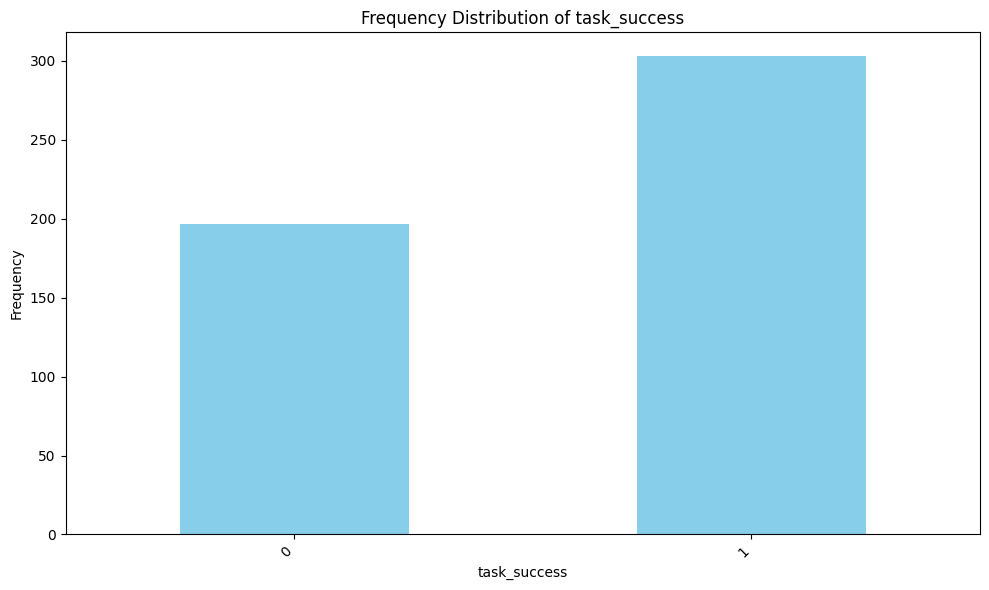

In [16]:
# prompt: generate distribution plots (bar graphs) for numerical columns based on their frequency

import matplotlib.pyplot as plt
# Distribution plots (bar graphs) for numerical columns based on their frequency
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [17]:
# prompt: Conversion from categorical data to numerical data vales

# Select categorical columns to encode
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


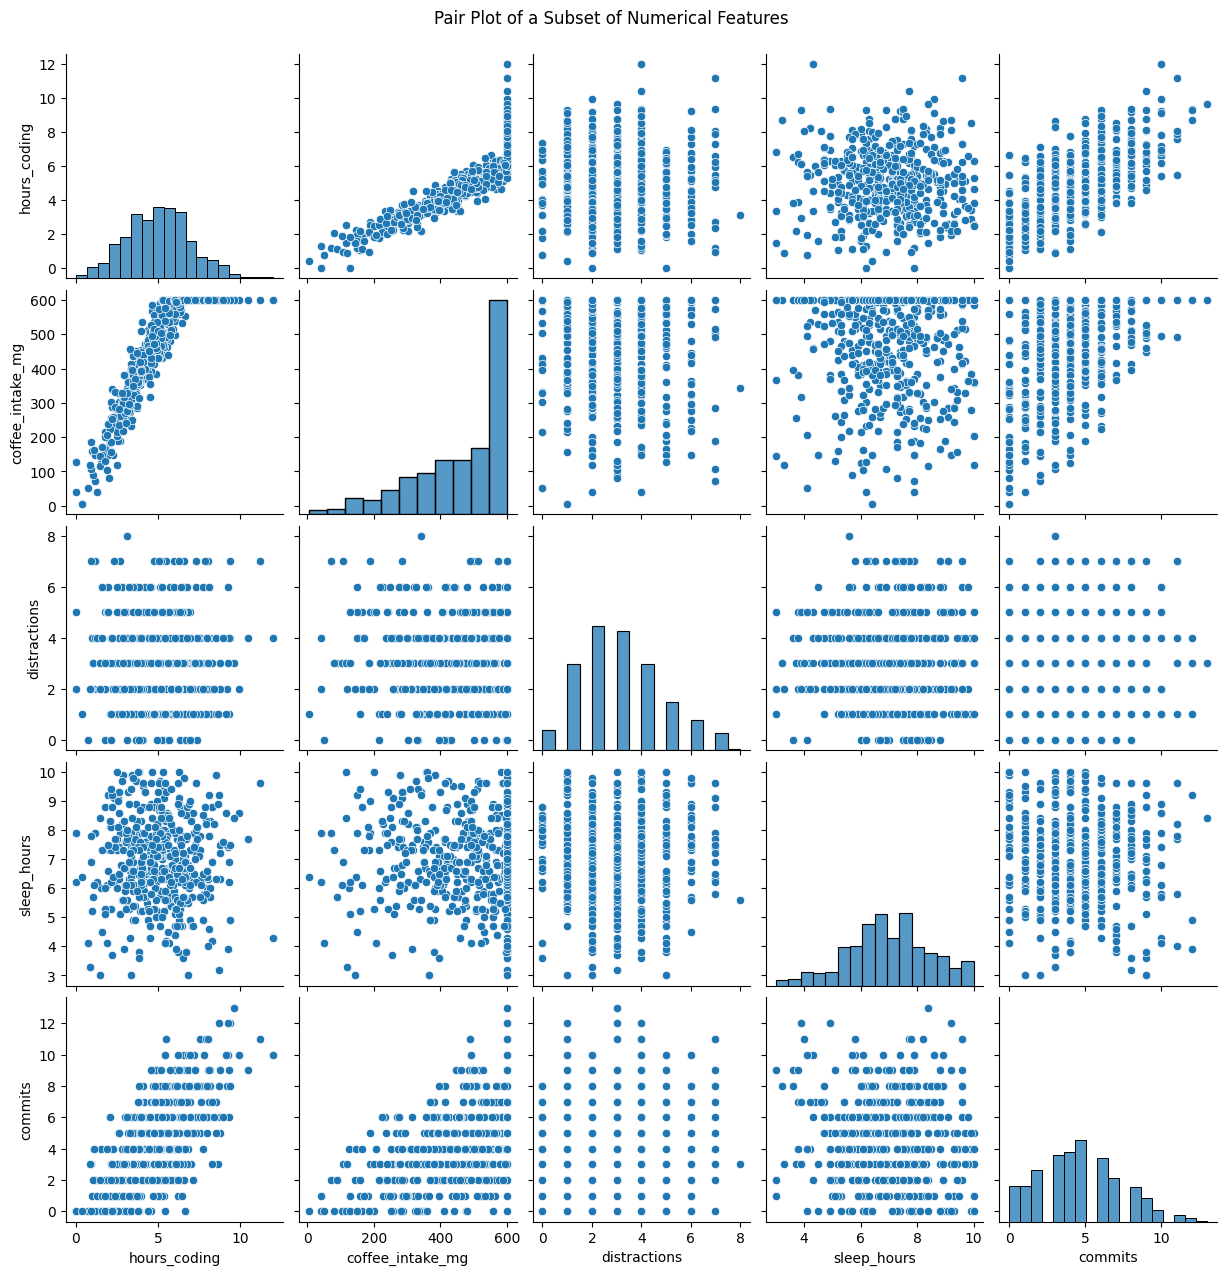

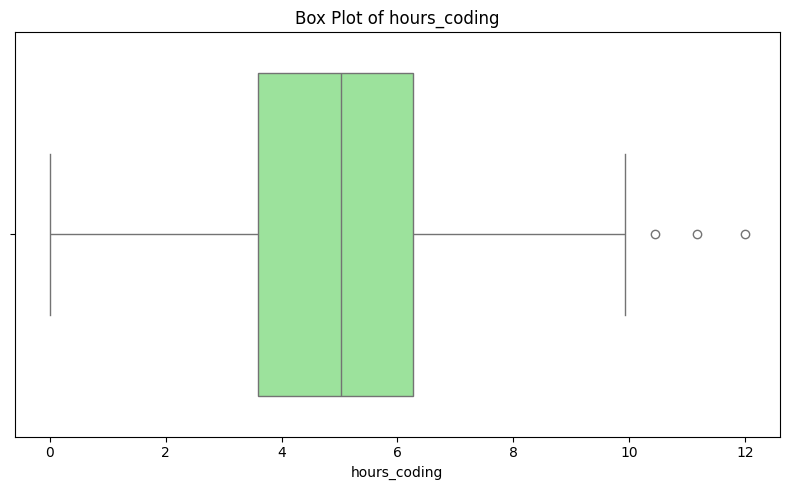

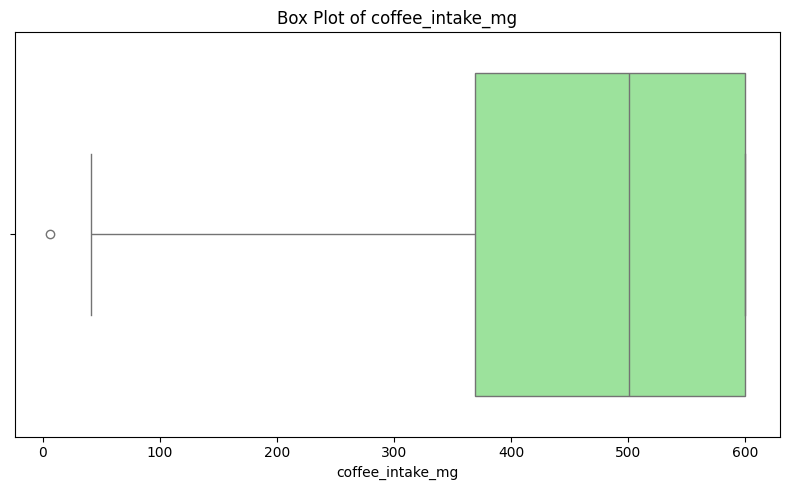

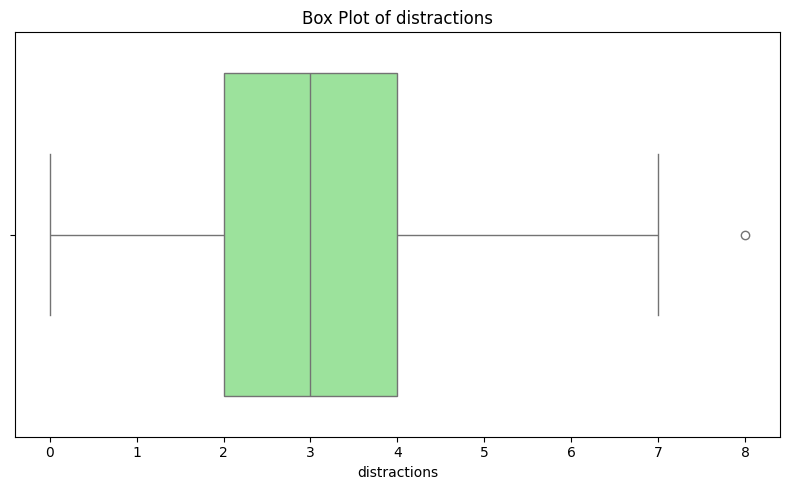

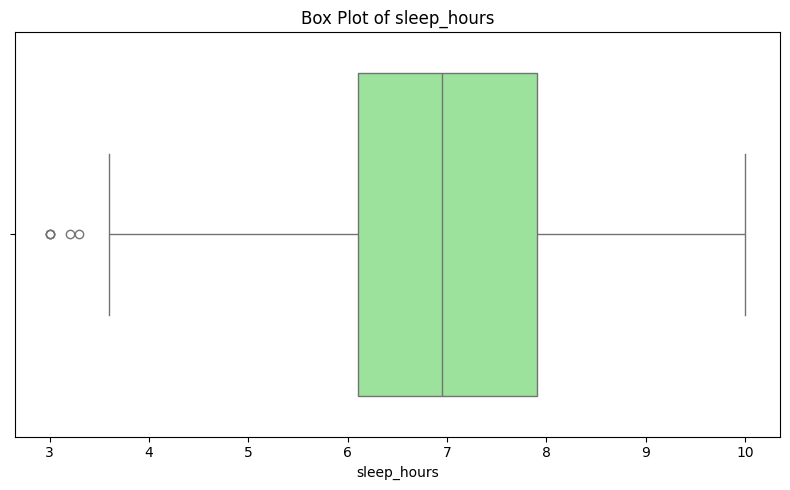

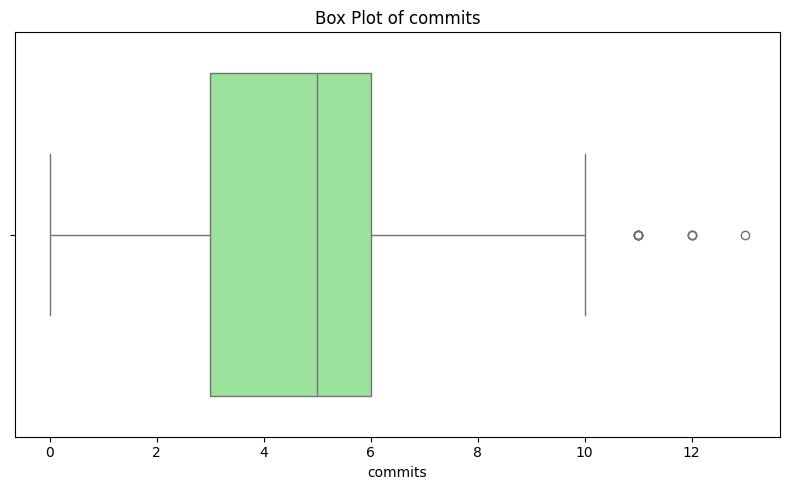

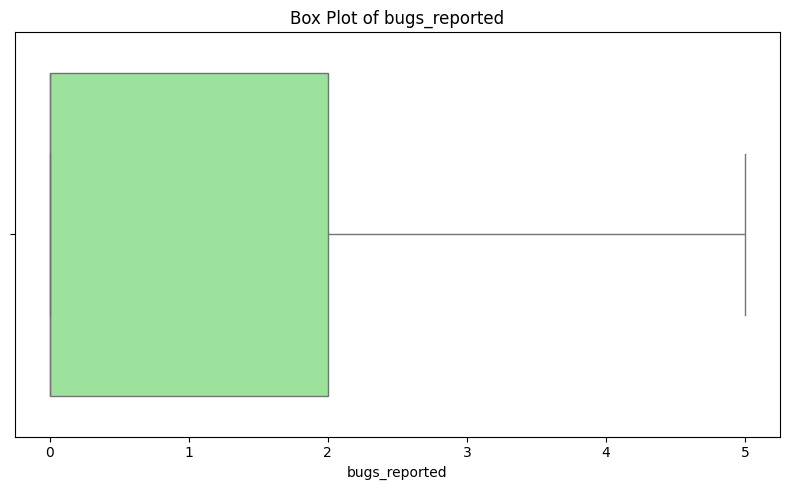

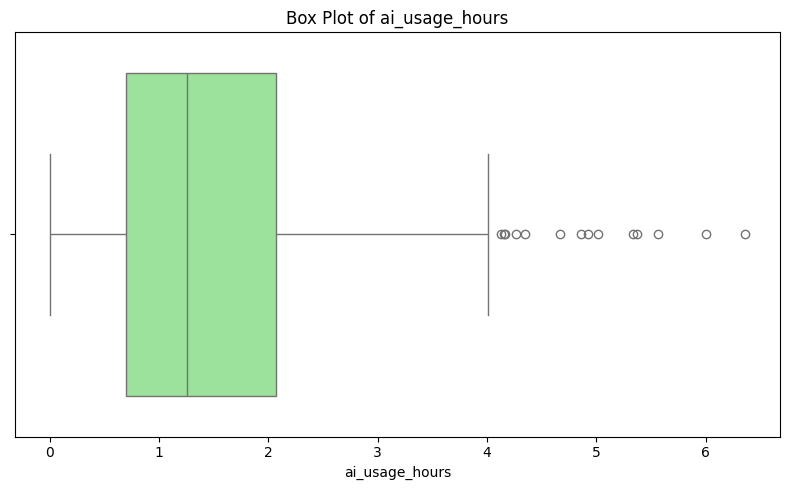

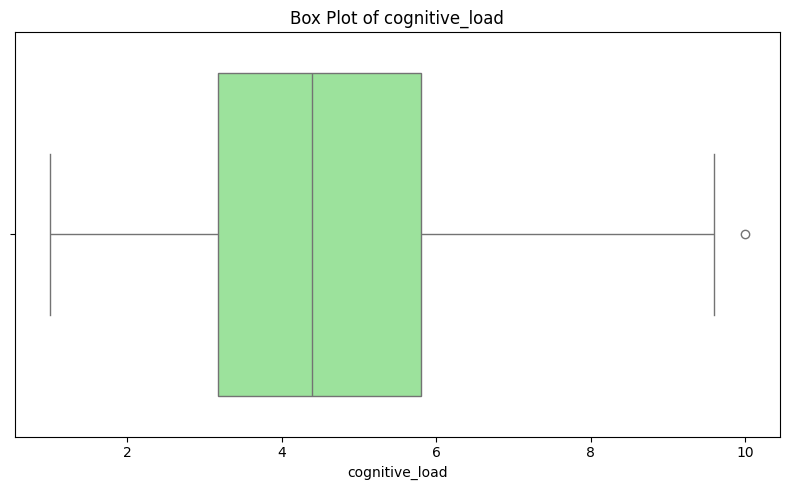

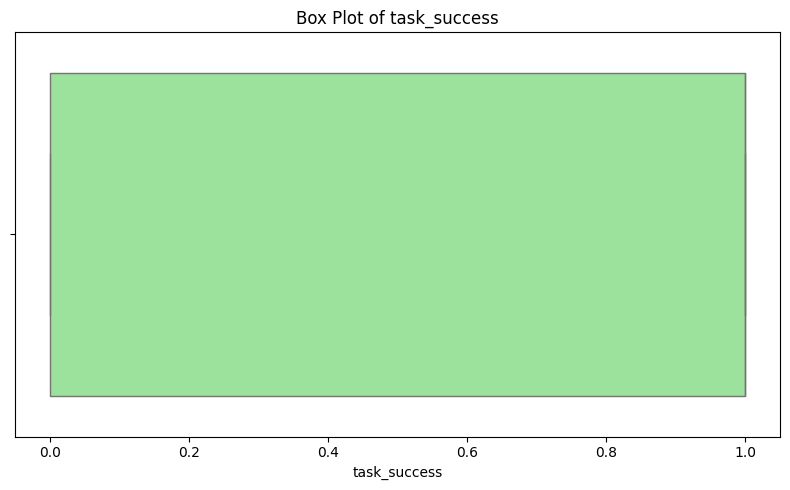

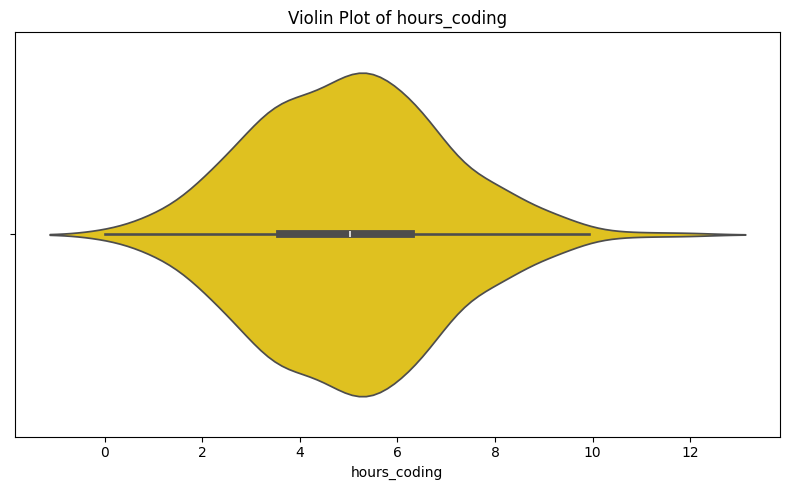

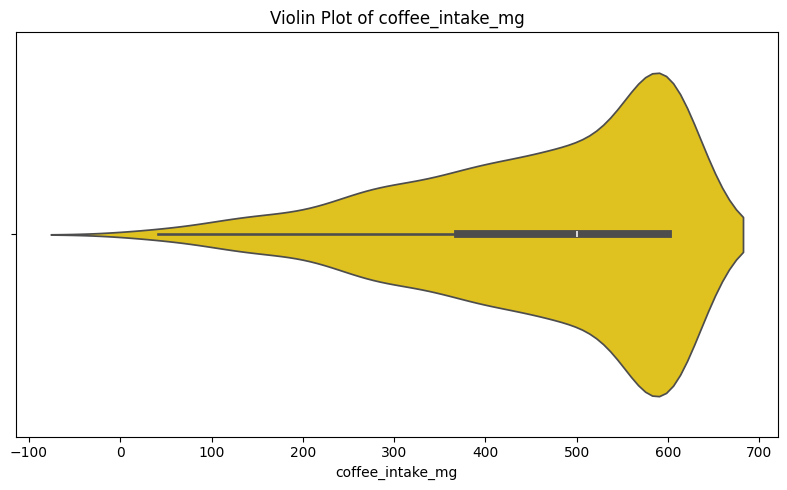

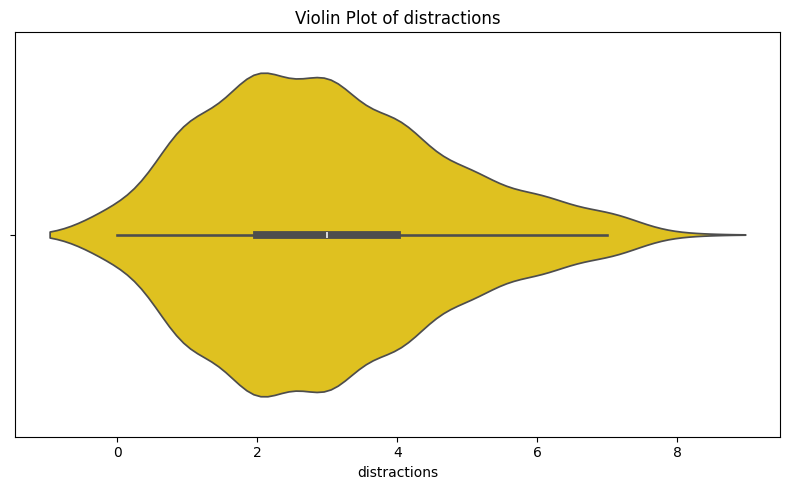

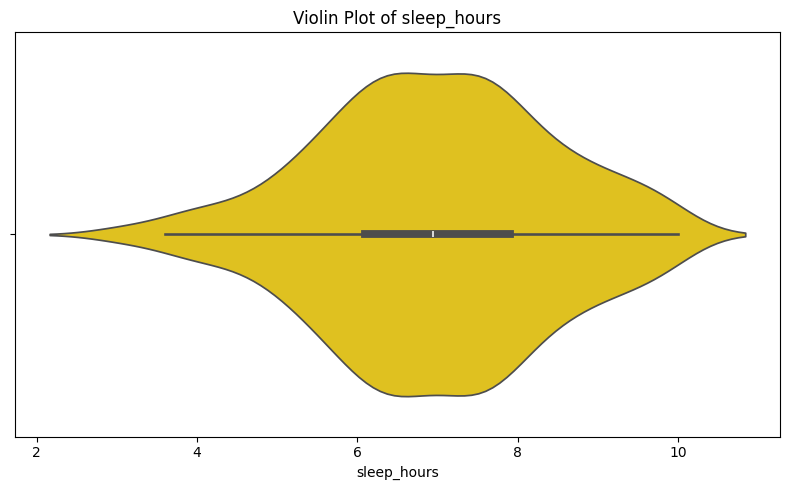

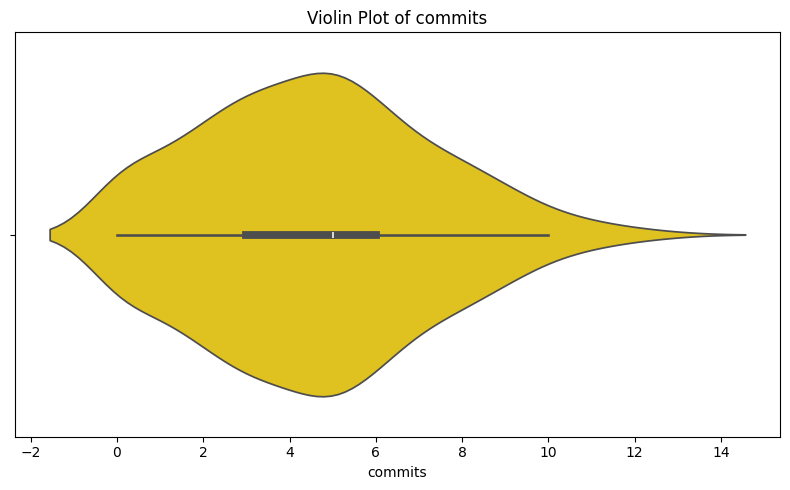

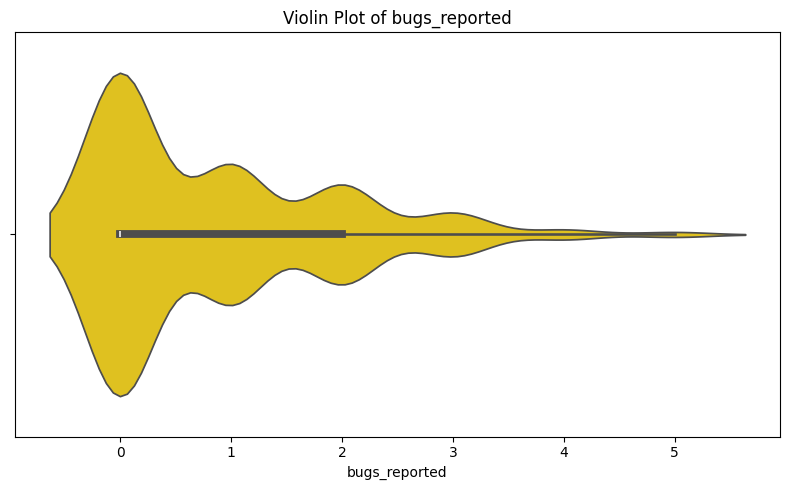

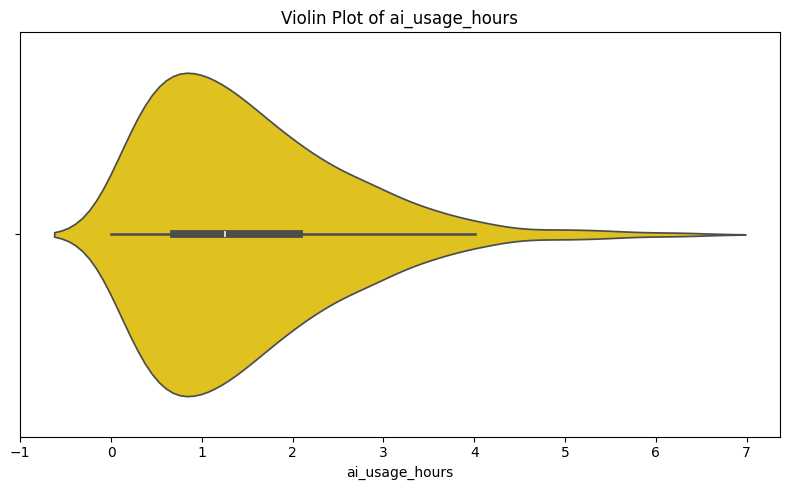

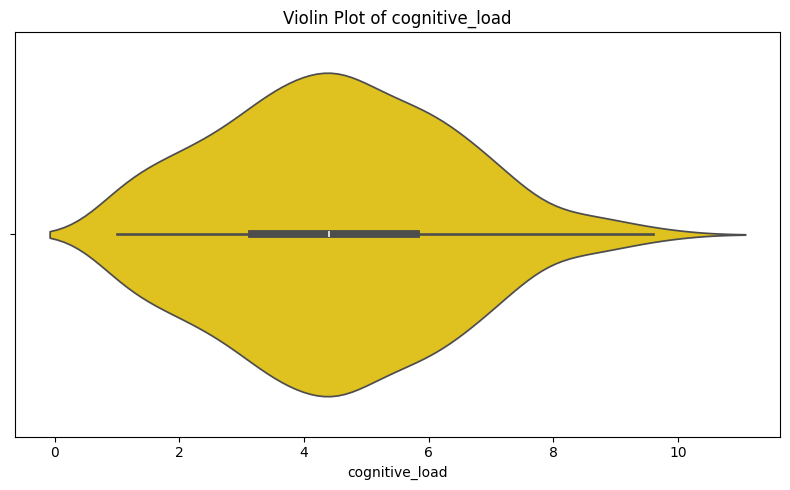

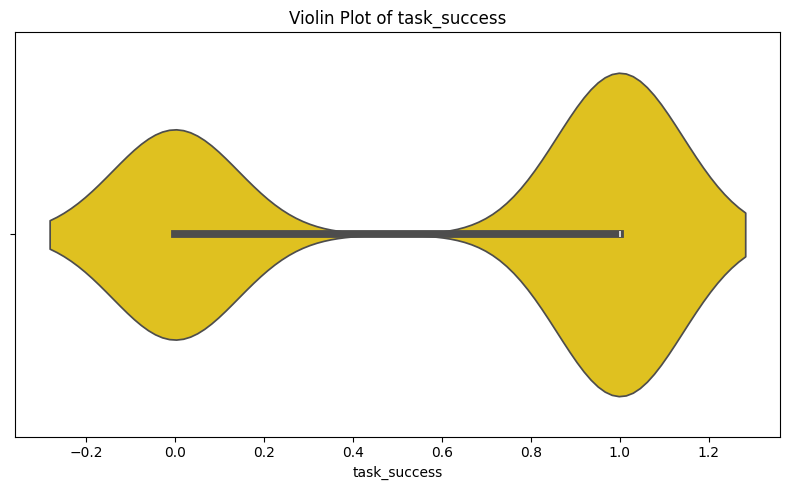

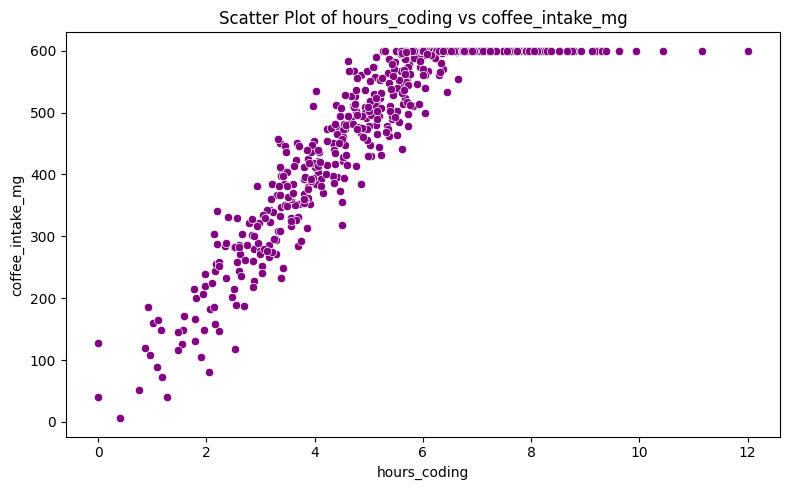

In [18]:
# prompt: generate more visualisation of the dataset

import pandas as pd
import matplotlib.pyplot as plt
# Pair plot for a subset of numerical features (can be computationally expensive for many features)
# Select a smaller subset if the dataset is large
subset_numerical_cols = numerical_cols[:5] # Adjust the number of columns as needed
if len(subset_numerical_cols) > 0:
    sns.pairplot(df[subset_numerical_cols])
    plt.suptitle('Pair Plot of a Subset of Numerical Features', y=1.02)
    plt.show()

# Box plots to visualize the distribution and detect outliers for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Violin plots for numerical features (combination of box plot and kernel density estimate)
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=df[col], color='gold')
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Stacked bar plots for categorical features against a target variable (if applicable)
# Assuming 'target_variable' is a categorical target column
# Replace 'target_variable' with the actual target column name
# if 'target_variable' in df.columns and df['target_variable'].dtype in ['object', 'category']:
#     for col in categorical_cols:
#         if col != 'target_variable':
#             plt.figure(figsize=(10, 6))
#             df.groupby([col, 'target_variable']).size().unstack().plot(kind='bar', stacked=True, cmap='viridis')
#             plt.title(f'Stacked Bar Plot of {col} by Target Variable')
#             plt.xlabel(col)
#             plt.ylabel('Count')
#             plt.xticks(rotation=45, ha='right')
#             plt.tight_layout()
#             plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]], color='purple')
    plt.title(f'Scatter Plot of {numerical_cols[0]} vs {numerical_cols[1]}')
    plt.xlabel(numerical_cols[0])
    plt.ylabel(numerical_cols[1])
    plt.tight_layout()
    plt.show()


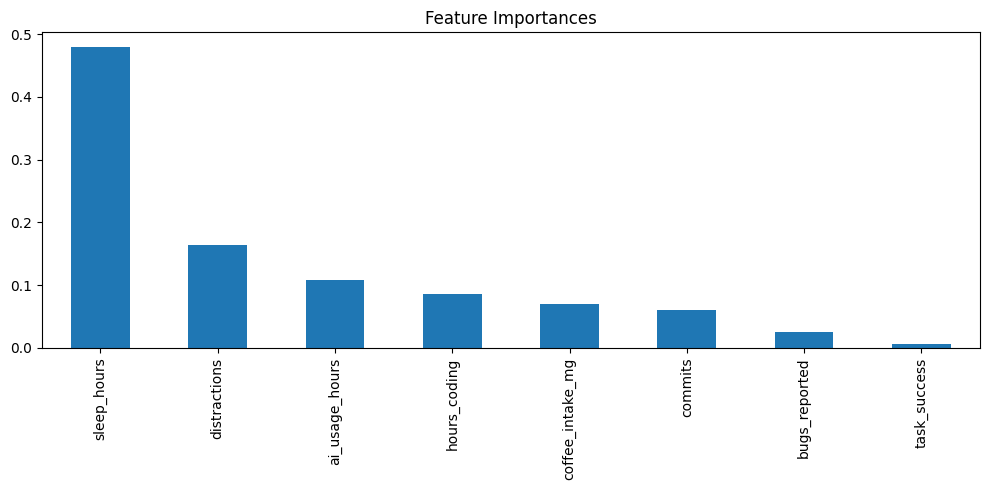

In [ ]:
df['high_cognitive_load'] = (df['cognitive_load'] > df['cognitive_load'].median()).astype(int)
X = df.drop(['cognitive_load', 'high_cognitive_load'], axis=1)
y = df['high_cognitive_load']

model = RandomForestRegressor()
model.fit(X, y)

# Feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Importances')
plt.tight_layout()
plt.show()

In [29]:
# prompt: run the train-test split cell also define X

# Define the target variable 'high_cognitive_load' based on the median of 'cognitive_load'
df['high_cognitive_load'] = (df['cognitive_load'] > df['cognitive_load'].median()).astype(int)

# Define the features (X) by dropping the original 'cognitive_load' and the new target variable
X = df.drop(['cognitive_load', 'high_cognitive_load'], axis=1)

# Define the target variable (y)
y = df['high_cognitive_load']

# Now, perform the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can add a print statement to confirm the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (400, 8)
Shape of X_test: (100, 8)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      400 non-null    float64
 1   coffee_intake_mg  400 non-null    float64
 2   distractions      400 non-null    float64
 3   sleep_hours       400 non-null    float64
 4   commits           400 non-null    float64
 5   bugs_reported     400 non-null    float64
 6   ai_usage_hours    400 non-null    float64
 7   task_success      400 non-null    float64
dtypes: float64(8)
memory usage: 28.1 KB


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_features = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'task_success'] # Removed 'cognitive_load'

# Check if X_train and X_test exist from the previous split
if 'X_train' in locals() and 'X_test' in locals():
    # Ensure that the columns to be scaled actually exist in the dataframes
    features_to_scale_train = [col for col in numeric_features if col in X_train.columns]
    features_to_scale_test = [col for col in numeric_features if col in X_test.columns]

    if features_to_scale_train and features_to_scale_test:
        # Scale the numerical features in X_train and X_test
        X_train[features_to_scale_train] = scaler.fit_transform(X_train[features_to_scale_train])
        X_test[features_to_scale_test] = scaler.transform(X_test[features_to_scale_test])
        print("Numerical features in X_train and X_test scaled successfully.")
    else:
        print("Warning: No numerical features found in X_train or X_test to scale from the specified list.")
else:
    print("Error: X_train and X_test were not found. Please run the train-test split cell first.")

Numerical features in X_train and X_test scaled successfully.


In [44]:
X_train_final_df = X_train.copy()
X_test_final_df =X_test.copy()

In [50]:
X_train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      400 non-null    float64
 1   coffee_intake_mg  400 non-null    float64
 2   distractions      400 non-null    float64
 3   sleep_hours       400 non-null    float64
 4   commits           400 non-null    float64
 5   bugs_reported     400 non-null    float64
 6   ai_usage_hours    400 non-null    float64
 7   task_success      400 non-null    float64
dtypes: float64(8)
memory usage: 28.1 KB


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours','task_success']
X_test_final_df[numeric_features]= scaler.fit_transform(X_test_final_df[numeric_features])
X_train_final_df[numeric_features]= scaler.fit_transform(X_train_final_df[numeric_features])

In [49]:
# prompt: build a model for the given dataset

import pandas as pd
# Dictionary to store results
results = {}

# Logistic Regression
start_time = time.time()
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_final_df, y_train)
lr_pred = lr_model.predict(X_test_final_df)
lr_acc = accuracy_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_final_df)[:, 1])
results['Logistic Regression'] = {'Accuracy': lr_acc, 'AUC': lr_auc, 'Time': time.time() - start_time}
print("Logistic Regression Done.")

# K-Nearest Neighbors
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_final_df, y_train)
knn_pred = knn_model.predict(X_test_final_df)
knn_acc = accuracy_score(y_test, knn_pred)
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_final_df)[:, 1])
results['KNN'] = {'Accuracy': knn_acc, 'AUC': knn_auc, 'Time': time.time() - start_time}
print("KNN Done.")

# Decision Tree
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_final_df, y_train)
dt_pred = dt_model.predict(X_test_final_df)
dt_acc = accuracy_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test_final_df)[:, 1])
results['Decision Tree'] = {'Accuracy': dt_acc, 'AUC': dt_auc, 'Time': time.time() - start_time}
print("Decision Tree Done.")

# Random Forest
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_final_df, y_train)
rf_pred = rf_model.predict(X_test_final_df)
rf_acc = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_final_df)[:, 1])
results['Random Forest'] = {'Accuracy': rf_acc, 'AUC': rf_auc, 'Time': time.time() - start_time}
print("Random Forest Done.")

# Gradient Boosting
start_time = time.time()
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_final_df, y_train)
gb_pred = gb_model.predict(X_test_final_df)
gb_acc = accuracy_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_final_df)[:, 1])
results['Gradient Boosting'] = {'Accuracy': gb_acc, 'AUC': gb_auc, 'Time': time.time() - start_time}
print("Gradient Boosting Done.")

# AdaBoost
start_time = time.time()
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train_final_df, y_train)
ab_pred = ab_model.predict(X_test_final_df)
ab_acc = accuracy_score(y_test, ab_pred)
ab_auc = roc_auc_score(y_test, ab_model.predict_proba(X_test_final_df)[:, 1])
results['AdaBoost'] = {'Accuracy': ab_acc, 'AUC': ab_auc, 'Time': time.time() - start_time}
print("AdaBoost Done.")

# Support Vector Machine (SVM) - RBF Kernel
start_time = time.time()
# Using probability=True to get predict_proba for AUC, can be slower
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_final_df, y_train)
svm_pred = svm_model.predict(X_test_final_df)
svm_acc = accuracy_score(y_test, svm_pred)
svm_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test_final_df)[:, 1])
results['SVM (RBF)'] = {'Accuracy': svm_acc, 'AUC': svm_auc, 'Time': time.time() - start_time}
print("SVM (RBF) Done.")

# Naive Bayes (Gaussian)
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train_final_df, y_train)
nb_pred = nb_model.predict(X_test_final_df)
nb_acc = accuracy_score(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test_final_df)[:, 1])
results['Naive Bayes'] = {'Accuracy': nb_acc, 'AUC': nb_auc, 'Time': time.time() - start_time}
print("Naive Bayes Done.")

# XGBoost
start_time = time.time()
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Add eval_metric
xgb_model.fit(X_train_final_df, y_train)
xgb_pred = xgb_model.predict(X_test_final_df)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_final_df)[:, 1])
results['XGBoost'] = {'Accuracy': xgb_acc, 'AUC': xgb_auc, 'Time': time.time() - start_time}
print("XGBoost Done.")

# LightGBM
start_time = time.time()
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_final_df, y_train)
lgbm_pred = lgbm_model.predict(X_test_final_df)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
lgbm_auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test_final_df)[:, 1])
results['LightGBM'] = {'Accuracy': lgbm_acc, 'AUC': lgbm_auc, 'Time': time.time() - start_time}
print("LightGBM Done.")


# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='AUC', ascending=False))

# Optional: Print classification reports and confusion matrices for some models
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_pred))
print("\nConfusion Matrix for XGBoost:")
print(confusion_matrix(y_test, xgb_pred))

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, lr_pred))
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, lr_pred))

Logistic Regression Done.
KNN Done.
Decision Tree Done.
Random Forest Done.
Gradient Boosting Done.
AdaBoost Done.
SVM (RBF) Done.
Naive Bayes Done.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:28:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Done.
[LightGBM] [Info] Number of positive: 194, number of negative: 206
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [58]:
# prompt: find the mean squarred error

import numpy as np
from sklearn.metrics import mean_squared_error

y_true_regression = df['cognitive_load'] # Example: Using the full column as true values (not ideal for evaluation)
# You would typically use y_test from a regression split.
# For this example, let's just create some dummy predictions.
# In a real scenario, y_pred_regression would come from your trained regressor's .predict() method on test data.
y_pred_regression = df['cognitive_load'] * np.random.rand(len(df)) * 1.1 # Dummy predictions

# Calculate Mean Squared Error
mse = mean_squared_error(y_true_regression, y_pred_regression)

print(f"\nMean Squared Error: {mse}")

# If you want to calculate the MSE for the Random Forest Classifier's predictions
# *against the original continuous 'cognitive_load'* (which is not standard),
# you would compare the classification predictions (0 or 1) to the continuous values.
# This isn't a typical use of MSE, but if that's the specific request:
mse_rf_classifier_vs_continuous = mean_squared_error(df.loc[y_test.index, 'cognitive_load'], rf_pred)
print(f"\nMSE of Random Forest Classifier Preds vs Original Cognitive Load: {mse_rf_classifier_vs_continuous}")



Mean Squared Error: 7.868282084418005

MSE of Random Forest Classifier Preds vs Original Cognitive Load: 18.9429


In [57]:
# prompt: find the accuracy of the model and predictions

# Print the accuracy for each model
print("\nAccuracy for each model:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}")

# Print the predictions for a chosen model (e.g., Random Forest)
# Note: predictions are binary (0 or 1) for classification
print("\nSample Predictions from Random Forest Model:")
# Print the first 10 predictions from the test set
print(rf_pred[:10])

# Print the true labels for comparison
print("\nCorresponding True Labels from Test Set:")
print(y_test[:10].values) # Use .values to get the numpy array from the Series




Accuracy for each model:
Logistic Regression: Accuracy = 0.7500
KNN: Accuracy = 0.7700
Decision Tree: Accuracy = 0.7400
Random Forest: Accuracy = 0.7200
Gradient Boosting: Accuracy = 0.7700
AdaBoost: Accuracy = 0.7400
SVM (RBF): Accuracy = 0.7500
Naive Bayes: Accuracy = 0.7000
XGBoost: Accuracy = 0.7600
LightGBM: Accuracy = 0.7500

Sample Predictions from Random Forest Model:
[1 1 1 0 0 0 0 0 1 1]

Corresponding True Labels from Test Set:
[1 1 0 0 1 0 0 0 1 1]
